In [1]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False, fscale=2, figsize=(8, 6))

from main import *
args.device = 'cuda:1'

In [ ]:
if __name__ == '__main__':
    # ===== Load AutoEncoder =====
    AE_name = 'PCA_AE16_BiLSTM32_L6NR S'
    AE, _, _ = AutoEncoder().load_model(
        os.path.join(args.AE_checkpoint_path, f'{AE_name}.pt'),
        device=args.device
    )
    
    # ===== Load clean data =====
    print('Cache clean testing data ...')
    pca = pickle.load(open(os.path.join(args.AE_checkpoint_path, 'PCA16.pkl'), 'rb'))
    dataset = cache_clean_data([pca, AE.Encoder], is_training=False, dataset_path=args.dataset_path, device=args.device)
#     dataset = cache_clean_data(is_training=False, dataset_path=args.dataset_path, device=args.device)
    print(f"Test set size: {len(dataset['Test'])}")
    
    # ===== Test set performance =====
    model_name = 'S+E CNN512 PCA_AE6 LF cat2 LSTM_384_Linear (norm)'
    model, _, _ = MultiModal_SE().load_model(
        os.path.join(args.MM_checkpoint_path, f'{model_name}.pt'),
        device=args.device
    )
    
    analyze(
        model, dataset, model_name, processes=8,
        use_griffin=False,
        evaluation_path=args.evaluation_path,
        dataset_path=args.dataset_path
    )

Model './checkpoint/AutoEncoder/PCA_AE16_BiLSTM32_L6NR S.pt' loaded.
Model './checkpoint/MultiModal/S+E CNN512 PCA_AE6 LF cat2 LSTM_384_Linear (norm n100 fix).pt' loaded.
Cache clean training data ...
Training set size: 222, Validation set size: 27


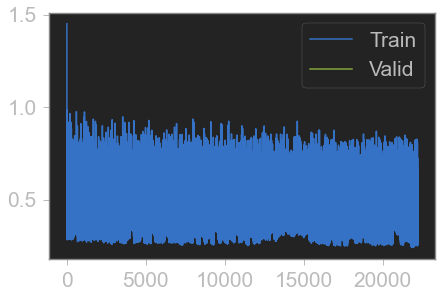

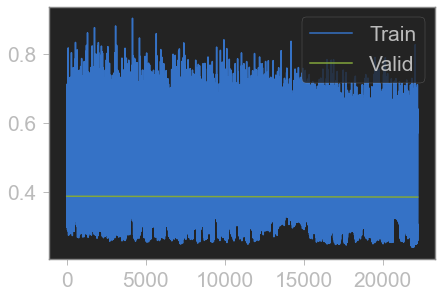

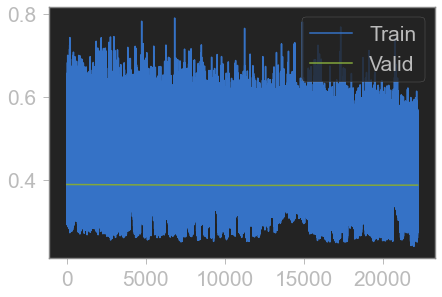

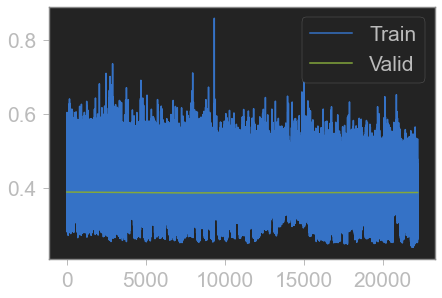

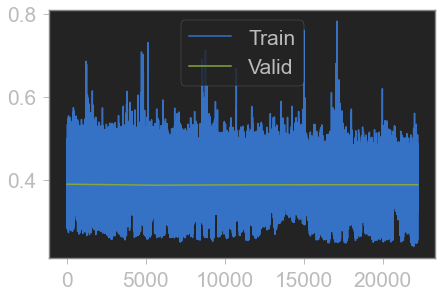

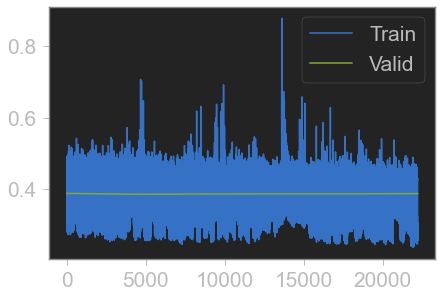

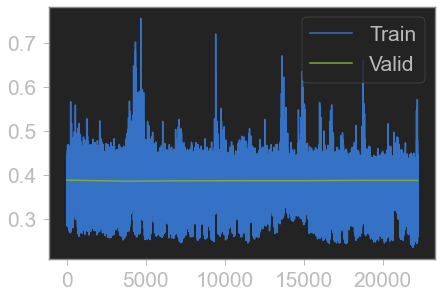

In [3]:
if __name__ == '__main__':
    # ===== Load AutoEncoder =====
#     AE_name = 'AE124_BiLSTM12NR S'
#     AE_name = 'PCA_AE16_BiLSTM32_L12NR S'
    AE_name = 'PCA_AE16_BiLSTM32_L6NR S'
    AE, _, _ = AutoEncoder().load_model(
        os.path.join(args.AE_checkpoint_path, f'{AE_name}.pt'),
        device=args.device
    )
    
    # ===== Build/Load MultiModal_SE =====
    model_name = 'S+E CNN512 PCA_AE6 LF cat2 LSTM_384_Linear (norm n100 fix)'
    
    model = MultiModal_SE()
    model, from_epoch, valid_loss_threshold = model.load_model(
        os.path.join(args.MM_checkpoint_path, f'{model_name}.pt'),
        device=args.device
    )
    valid_loss_threshold = 1e9
    
#     baseline_model, _, _ = model.load_model(
#         os.path.join(args.MM_checkpoint_path, 'S CNN512 LSTM_384_Linear (norm n100).pt'),
#         device=args.device
#     )
    
#     from_epoch, valid_loss_threshold = 0, 1e9
    
    # (N, Seq, 257) -> (N, Seq, 16 * 128)
#     model.S_Encoder = nn.Identity()
#     model.S_Encoder = nn.Sequential(OrderedDict([
#         ('unsq_0', Unsqueeze(0)),
#         ('conv_0', nn.Conv2d(1, 32, (5, 25), 1, (2, 12), bias=False)),
#         ('norm_0', nn.InstanceNorm2d(32, affine=True)),
#         ('pool_1', nn.MaxPool2d((1, 2))),
#         ('conv_2', nn.Conv2d(32, 32, (5, 17), 1, (2, 8), bias=False)),
#         ('norm_2', nn.InstanceNorm2d(32, affine=True)),
#         ('conv_3', nn.Conv2d(32, 16, (5, 9), 1, (2, 4), bias=False)),
#         ('norm_3', nn.InstanceNorm2d(16, affine=True)),
#         ('reshape', Reshape(16, 128)),
#     ]))
#     model.S_Encoder = ResCNN(input_channel=1, input_size=Const.FBIN, use_residual=False)
#     model.S_Encoder = baseline_model.S_Encoder
#     del baseline_model
        
    # (N, Seq, 124) -> (N, Seq, 12) or None
#     model.E_Encoder = nn.Identity()
#     model.E_Encoder = nn.Sequential(OrderedDict([
#         ('L_0', nn.Linear(124, 257, bias=False)),
#         ('norm_0', nn.LayerNorm(257, elementwise_affine=True)),
#         ('relu_0', nn.LeakyReLU(negative_slope=0.3)),
#     ]))
#     model.E_Encoder = nn.Sequential(OrderedDict([
#         *list(AE.Encoder._modules.items()),
#         ('L_1', nn.Linear(12, 16*128)),
#         ('relu_1', nn.LeakyReLU(negative_slope=0.3, inplace=True)),
#     ]))
    
#     for name, para in model.S_Encoder.named_parameters():
#         para.requires_grad = False
#     for name, para in model.E_Encoder.named_parameters():
#         if '_0' in name:
#             para.requires_grad = False
    
    # (N, Seq, 2 Encoders input size) -> (N, Seq, fusion size) or None
#     model.Fusion_layer = nn.Sequential(OrderedDict([
# #         ('unfold_4', SeqUnfold_Reshape(frame_seq=args.frame_seq)),
#         ('lstm_4', nn.LSTM(input_size=4*128+6, hidden_size=384, bias=False, batch_first=True, dropout=0, bidirectional=True)),
# #         ('flat_4', SeqFlatten()),
        
# #         ('unsq_4', Unsqueeze(0)),
# #         ('unfold_4', SeqUnfold()),
        
# #         ('L_5', nn.Linear(512*args.frame_seq, 512, bias=False)),
#         ('L_5', nn.Linear(384, 384, bias=False)),
#         ('norm_5', nn.LayerNorm(384, elementwise_affine=True)),
#         ('relu_5', nn.LeakyReLU(negative_slope=0.3)),
#     ]))
    
# #     # (N, Seq, fusion size or S_Encoder latent size) -> (N, Seq, 257)
#     model.S_Decoder = nn.Sequential(OrderedDict([
#         ('L_6', nn.Linear(384, 257, bias=False)),
#         ('relu_6', nn.LeakyReLU(negative_slope=0.3, inplace=True))
#     ]))
        
    # (N, Seq, fusion size or S_Encoder latent size) -> (N, Seq, 124) or None
#     model.E_Decoder = nn.Sequential(OrderedDict([
#         ('L_6', nn.Linear(512, 124, bias=False)),
#         ('relu_6', nn.LeakyReLU(negative_slope=0.3, inplace=True)),
#     ]))

    model.is_late_fusion = True
    model.fusion_type = 'concat'
    model.fusion_channel = -1
    model.use_norm = True
    
    model.to(args.device)
    
    # ===== Load clean data =====
    print('Cache clean training data ...')
    pca = pickle.load(open(os.path.join(args.AE_checkpoint_path, 'PCA16.pkl'), 'rb'))
    dataset = cache_clean_data([pca, AE.Encoder], split_ratio=args.split_ratio, dataset_path=args.dataset_path, device=args.device)
#     dataset = cache_clean_data(split_ratio=args.split_ratio, dataset_path=args.dataset_path, device=args.device)
    print(f"Training set size: {len(dataset['Train'])}, Validation set size: {len(dataset['Valid'])}")
    
#     args.lr /= 5
    loss_fn = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)
    
    model_name = 'S+E CNN512 PCA_AE6 LF cat2 LSTM_384_Linear (norm n100 fix) (zero_pad)'
    train(model, dataset,
          from_epoch, args.batch_size,
          valid_loss_threshold, args.loss_coef,
          loss_fn, optimizer,
          save_filename=os.path.join(args.MM_checkpoint_path, model_name),
          dataset_path=args.dataset_path,
          use_zero_pad=True,
    )